In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df_oshp= pd.read_csv(r"data/online_shoppers_intention.csv")

In [10]:
df_oshp.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [11]:
df_oshp

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:

def categorize_columns(df):
    # Initialize dictionaries to hold categorized column names
    categorical_cols = []
    numerical_cols = []
    datetime_cols = []
    month_cols = []

    # Iterate over each column and categorize based on data type
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            datetime_cols.append(col)
            # Check if the column represents months specifically
            if all(df[col].dt.day == 1) and all(df[col].dt.hour == 0) and all(df[col].dt.minute == 0) and all(df[col].dt.second == 0):
                month_cols.append(col)
        else:
            categorical_cols.append(col)

    # Print categorized lists
    print("Categorical Columns:", categorical_cols)
    print("Numerical Columns:", numerical_cols)
    print("Datetime Columns:", datetime_cols)
    print("Month Columns:", month_cols)




In [5]:
categorize_columns(df_oshp)

Categorical Columns: ['Month', 'VisitorType']
Numerical Columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']
Datetime Columns: []
Month Columns: []


In [6]:
num_cols= ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']

In [7]:
df_oshp.Revenue.value_counts()


Revenue
False    10422
True      1908
Name: count, dtype: int64

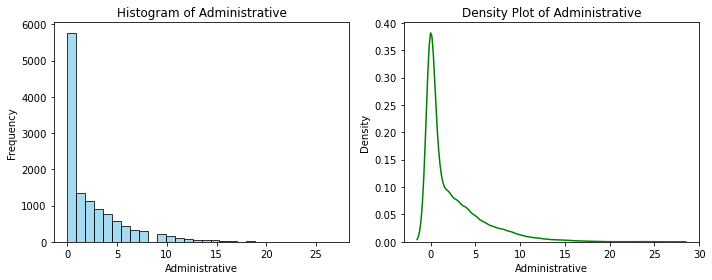

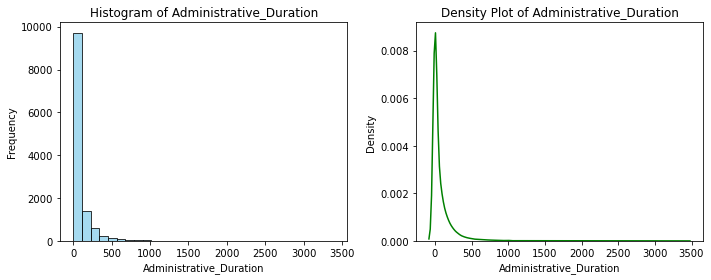

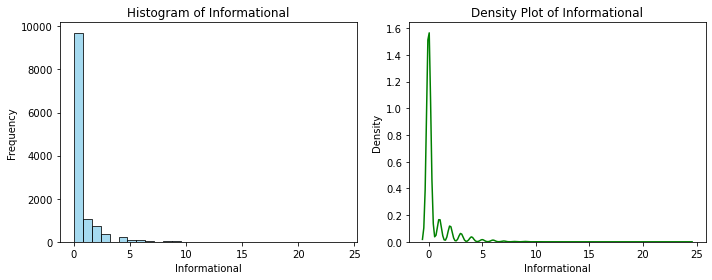

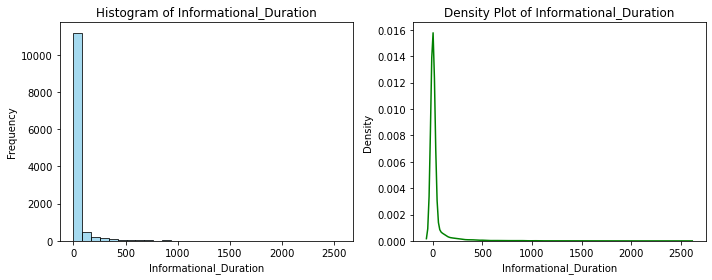

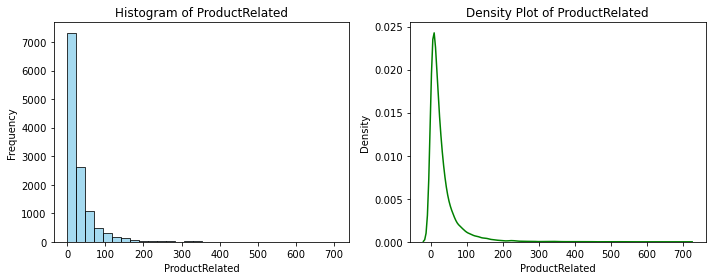

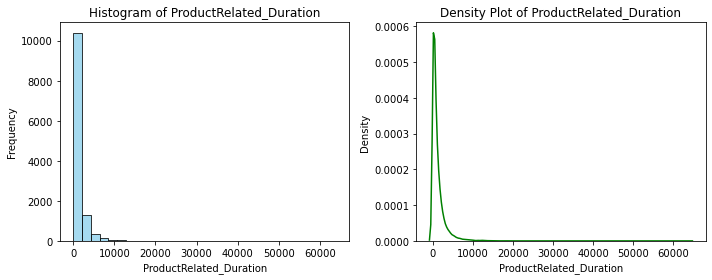

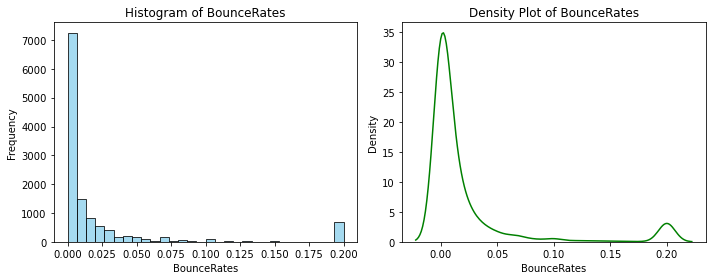

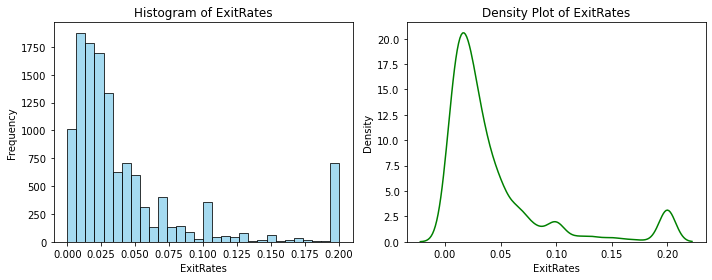

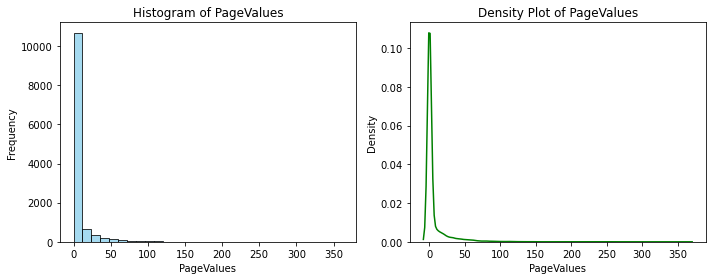

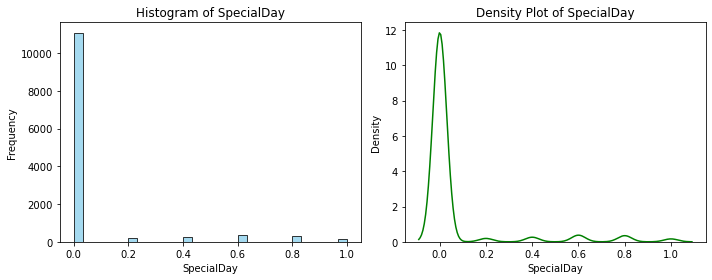

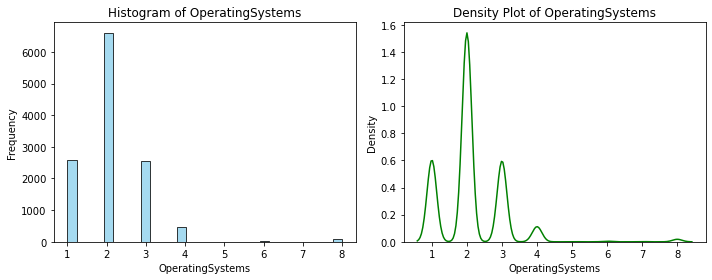

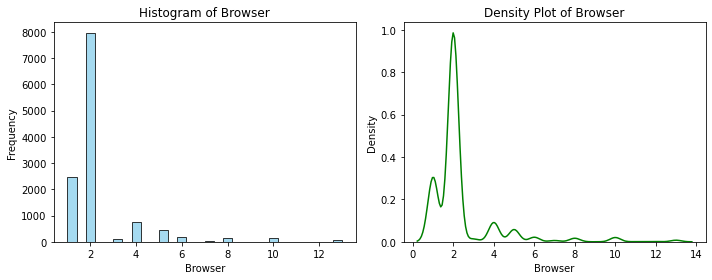

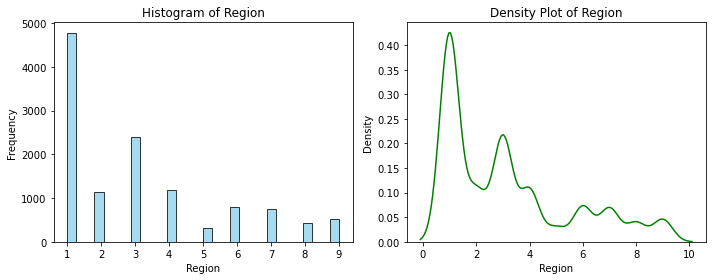

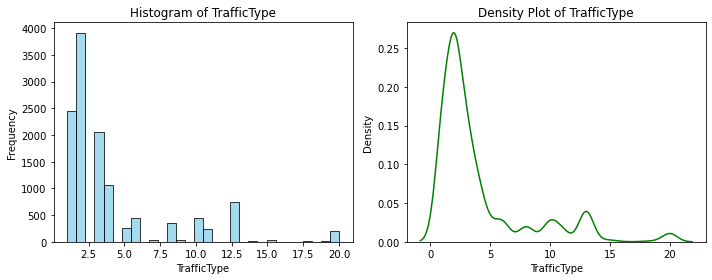

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_stats(df):
    """
    Plots the histogram and density plot for each numerical column in the DataFrame.
    
    Args:
    df (pd.DataFrame): DataFrame containing only numerical columns.
    """
    num_columns = df.select_dtypes(include=['number']).columns
    for col in num_columns:
        plt.figure(figsize=(10, 4))
        
        # Plot histogram
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
        sns.histplot(df[col], kde=False, color='skyblue', bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        # Plot density
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
        sns.kdeplot(df[col], color='green')
        plt.title(f'Density Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        
        plt.tight_layout()
        plt.show()


# Call the function with the DataFrame
plot_numerical_stats(df_oshp)


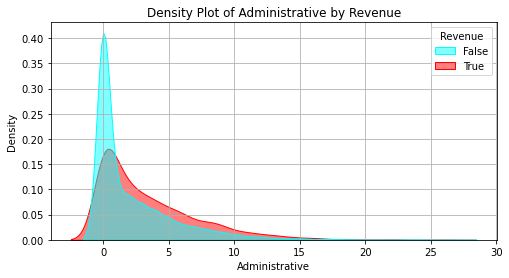

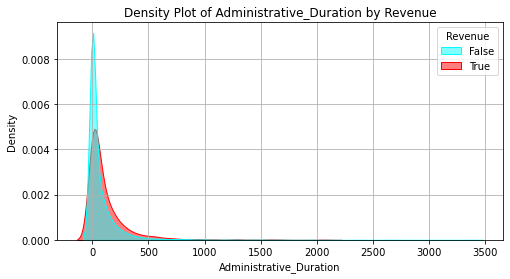

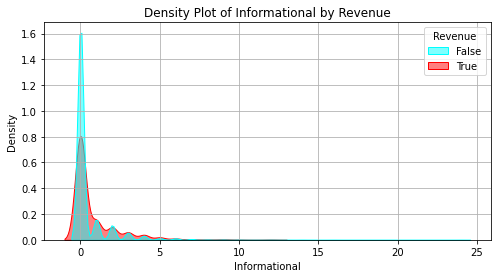

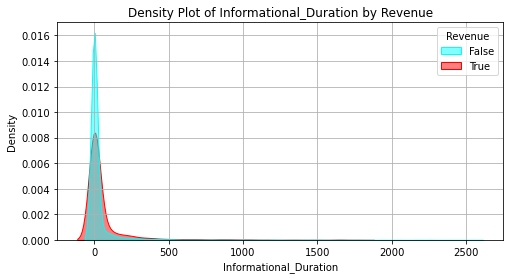

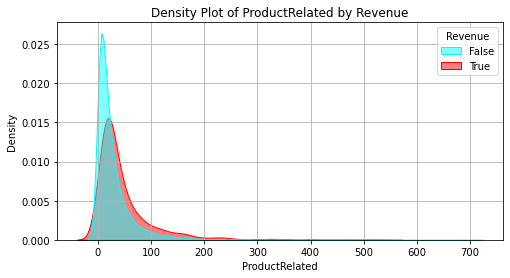

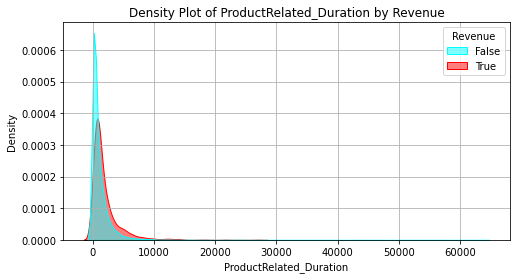

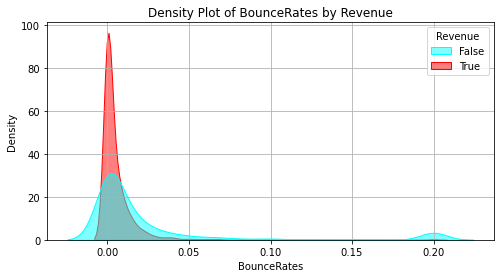

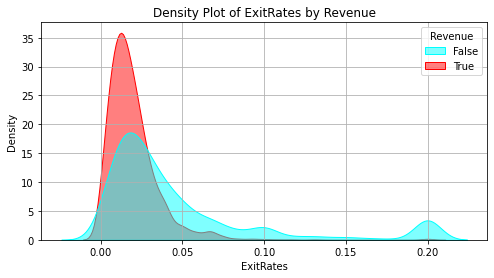

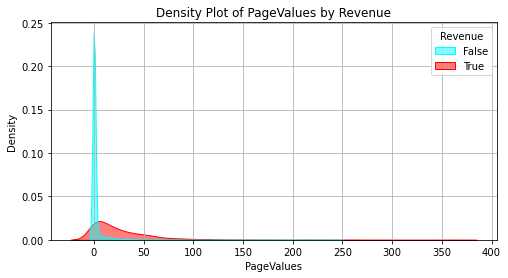

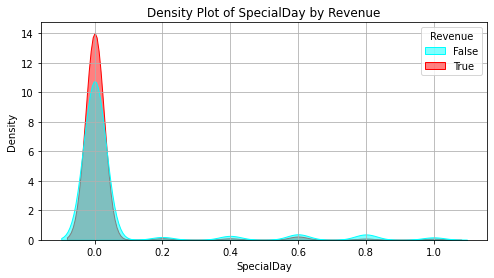

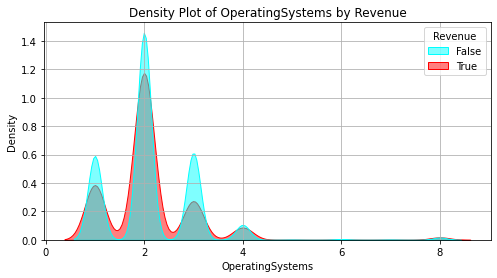

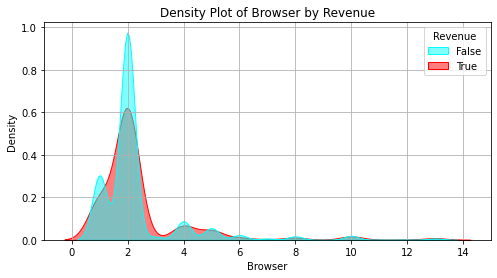

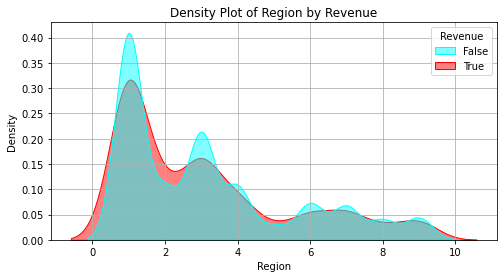

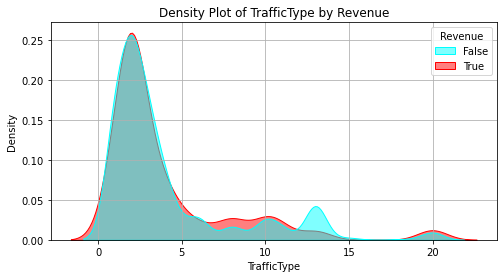

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density_by_category_auto(df, target_column):
    """
    Automatically detects numerical columns in the DataFrame and plots density plots
    for each numerical column by target category using seaborn.
    
    Args:
    df (pd.DataFrame): DataFrame containing the data.
    target_column (str): Column name of the binary target.
    """
    # Select only numerical columns from the DataFrame
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=df, x=col, hue=target_column, fill=True, common_norm=False, palette=["cyan", "red"], alpha=0.5)
        plt.title(f'Density Plot of {col} by {target_column}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()


plot_density_by_category_auto(df_oshp, 'Revenue')


In [27]:
from pandas_profiling import ProfileReport

c:\Users\mucn323\AppData\Local\anaconda3\envs\FDICAI_KERAS\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
df_input=df_oshp[num_cols]
profile = ProfileReport(df_input, title="Pandas Profiling Report", explorative=True)
profile.to_file("Stats_summary_report.html")

c:\Users\mucn323\AppData\Local\anaconda3\envs\FDICAI_KERAS\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]


In [8]:

import os
import pandas as pd
import numpy as np 
# import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as statsistics
import matplotlib
# matplotlib.use('Agg')  # Set the backend to 'Agg' before importing pyplot
import matplotlib.pyplot as plt

# from pandas_profiling import ProfileReport

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


class CsvAnalyzer:
    def __init__(self, csv_file_path, columns, target_column, output_dir):
        self.df = pd.read_csv(csv_file_path)
        self.columns = columns
        self.target_column = target_column
        self.output_dir = output_dir
        self.scaled_df = None  # Initialize scaled DataFrame as None

        # Create the output directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Scale features as part of initialization
        self.scale_features()


    def scale_features(self):
        """
        Scales numerical features using StandardScaler after handling NaN and infinite values.
        """
        # Select numeric columns
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns

        # Handle infinite values by replacing them with NaN
        self.df[numeric_cols] = self.df[numeric_cols].replace([np.inf, -np.inf], np.nan)

        # Optionally, fill NaN values with a statistic like the mean or median of each column
        # This step is necessary if you have NaNs that you don't want to drop
        for column in numeric_cols:
            self.df[column].fillna(self.df[column].mean(), inplace=True)

        # Initialize the scaler
        scaler = StandardScaler()

        # Apply the scaler to the numeric columns
        self.scaled_df = scaler.fit_transform(self.df[numeric_cols])


    def generate_plots(self):
        for column in self.columns:
            # Create a figure with two subplots (histogram and density plot)
            fig, ax = plt.subplots(2, 1, figsize=(10, 8))

            # Plot histogram
            sns.histplot(self.df[column], kde=False, ax=ax[0])
            ax[0].set_title(f'Histogram for {column}')

            # Check if the column is numeric before plotting a KDE
            if pd.api.types.is_numeric_dtype(self.df[column]):
                # Plot density plot
                sns.kdeplot(self.df[column], ax=ax[1], fill=True)
                ax[1].set_title(f'Density Plot for {column}')
            else:
                # Plot count plot for categorical data
                sns.countplot(x=self.df[column], ax=ax[1])
                ax[1].set_title(f'Count Plot for {column}')

            # Optionally highlight outliers in the histogram if it's numeric
            if pd.api.types.is_numeric_dtype(self.df[column]):
                outliers = self.find_outliers(self.df[column])
                if outliers is not None:  # Ensure outliers were calculated
                    ax[0].axvline(outliers[0], color='red', linestyle='dashed', linewidth=2, label='Outlier Boundary')
                    ax[0].axvline(outliers[1], color='red', linestyle='dashed', linewidth=2)
                    ax[0].legend()

            # Save the plot as PNG
            file_path = os.path.join(self.output_dir, f'{column}_plot.png')
            # plt.tight_layout()
            plt.savefig(file_path)
            plt.close()  # Close the figure to release resources

            print(f'Plot saved as {file_path}')
    
    def generate_plots(self):
        for column in self.columns:
            # Create a figure with two subplots (histogram and density plot) with increased figure size
            fig, ax = plt.subplots(2, 1, figsize=(12, 10))

            # Plot histogram with specified bins if necessary
            sns.histplot(self.df[column], kde=False, ax=ax[0], bins='auto')  # 'auto' can be replaced with a specific number
            ax[0].set_title(f'Histogram for {column}')
            ax[0].set_xlabel('')
            ax[0].set_ylabel('Frequency')

            # Check if the column is numeric before plotting a KDE
            if pd.api.types.is_numeric_dtype(self.df[column]):
                # Plot density plot
                sns.kdeplot(self.df[column], ax=ax[1], fill=True)
                ax[1].set_title(f'Density Plot for {column}')
            else:
                # Plot count plot for categorical data
                sns.countplot(x=self.df[column], ax=ax[1])
                ax[1].set_title(f'Count Plot for {column}')

            # Highlight outliers in the histogram if it's numeric
            if pd.api.types.is_numeric_dtype(self.df[column]):
                outliers = self.find_outliers(self.df[column])
                if outliers is not None:  # Ensure outliers were calculated
                    ax[0].axvline(outliers[0], color='red', linestyle='dashed', linewidth=2, label='Lower Outlier Boundary')
                    ax[0].axvline(outliers[1], color='red', linestyle='dashed', linewidth=2, label='Upper Outlier Boundary')
                    ax[0].legend()

            # Adjust layout to prevent overlap and use tight layout to optimize spacing
            plt.tight_layout(pad=2.0)  # Adjust padding between and around subplots

            # Save the plot as PNG
            file_path = os.path.join(self.output_dir, f'{column}_plot.png')
            plt.savefig(file_path)
            plt.close()  # Close the figure to release resources

            print(f'Plot saved as {file_path}')
    def generate_plots(self):
        # Dictionary to hold statistics for all columns
        all_stats = {}

        for column in self.columns:
            # Create a figure with two subplots (histogram and density plot) with increased figure size
            fig, ax = plt.subplots(2, 1, figsize=(12, 10))

            # Plot histogram with specified bins if necessary
            sns.histplot(self.df[column], kde=False, ax=ax[0], bins='auto')  # 'auto' can be replaced with a specific number
            ax[0].set_title(f'Histogram for {column}')
            ax[0].set_xlabel('')
            ax[0].set_ylabel('Frequency')

            # Check if the column is numeric before plotting a KDE
            if pd.api.types.is_numeric_dtype(self.df[column]):
                # Plot density plot
                sns.kdeplot(self.df[column], ax=ax[1], fill=True)
                ax[1].set_title(f'Density Plot for {column}')

                # Calculate statistics and store them
                stats = self.calculate_statistics(self.df[column])
                all_stats[column] = stats  # Store stats for later use

            else:
                # Plot count plot for categorical data
                sns.countplot(x=self.df[column], ax=ax[1])
                ax[1].set_title(f'Count Plot for {column}')

            # Highlight outliers in the histogram if it's numeric
            if pd.api.types.is_numeric_dtype(self.df[column]):
                outliers = self.find_outliers(self.df[column])
                if outliers is not None:  # Ensure outliers were calculated
                    ax[0].axvline(outliers[0], color='red', linestyle='dashed', linewidth=2, label='Lower Outlier Boundary')
                    ax[0].axvline(outliers[1], color='red', linestyle='dashed', linewidth=2, label='Upper Outlier Boundary')
                    ax[0].legend()

            # Adjust layout to prevent overlap and use tight layout to optimize spacing
            plt.tight_layout(pad=2.0)  # Adjust padding between and around subplots

            # Save the plot as PNG
            file_path = os.path.join(self.output_dir, f'{column}_plot.png')
            plt.savefig(file_path)
            plt.close()  # Close the figure to release resources

            print(f'Plot saved as {file_path}')

        # After all plots are generated, save the statistics to a CSV file
        stats_df = pd.DataFrame.from_dict(all_stats, orient='index')
        stats_csv_path = os.path.join(self.output_dir, 'summary_statistics.csv')
        stats_df.to_csv(stats_csv_path)
        print(f'Summary statistics saved as {stats_csv_path}')      

    
    def perform_pca(self, columns, n_components=2):
        # Select only the specified columns for PCA
        if not all(col in self.df.columns for col in columns):
            raise ValueError("One or more columns are not in the DataFrame")

        data_subset = self.df[columns].select_dtypes(include=[np.number])
        columns_in=data_subset.columns
        # Handle missing values for PCA as they can't handle NaN values
        data_subset.fillna(data_subset.mean(), inplace=True)

        scaler = StandardScaler()
        data_subset = scaler.fit_transform(data_subset)

        # Initialize PCA
        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(data_subset)
        
        # Create a DataFrame for the PCA results
        pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA{i+1}' for i in range(n_components)])
        pca_df[self.target_column] = self.df[self.target_column].values  # Add target column to PCA DataFrame

        eigenvalues = pca.explained_variance_
        eigenvectors = pd.DataFrame(pca.components_, columns=columns_in)

        # Plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue=self.target_column, palette='viridis', legend='full')
        plt.title('PCA Result Plot')
        plt.legend(title=self.target_column)
        plt.show()

        return pca_df, eigenvalues, eigenvectors


    def perform_tsne(self, columns, n_components=2, perplexity=40, n_iter=300):
        # self.df=self.df[columns]
        self.data_subset = self.df[columns].select_dtypes(include=[np.number])

        tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter)
        tsne_results = tsne.fit_transform(self.data_subset)
        tsne_df = pd.DataFrame(data=tsne_results, columns=[f'TSNE{i+1}' for i in range(n_components)])
        tsne_df[self.target_column] = self.df[self.target_column].values  # Add target column to t-SNE DataFrame

        # Plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue=self.target_column, palette='viridis', legend='full')
        plt.title('t-SNE Result Plot')
        plt.legend(title=self.target_column)
        plt.show()



    def find_outliers(self, series, threshold=1.5):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return lower_bound, upper_bound

    def calculate_statistics(self, series):
        stats = {
            'Count': series.count(),
            'Min': series.min(),
            'Max': series.max(),
            'Mean': series.mean(),
            'Median': series.median(),
            'Mode': ', '.join(map(str, series.mode())),  # Handling multiple modes
            'STD': series.std(),
            'Skewness': series.skew(),
            'Kurtosis': series.kurt()
        }
        return stats
    def plot_correlation_matrix(self, subset=None):
        """
        Plots a correlation matrix for the specified subset of columns. If no subset is provided,
        the correlation matrix will include all columns.

        :param subset: list, a list of column names to include in the correlation matrix. If None, use all columns.
        """
        # Use subset of columns for correlation matrix or default to all columns
        if subset is not None:
            # Ensure all elements in subset are actually in the dataframe columns
            subset = [col for col in subset if col in self.df.columns]
            data = self.df[subset]
        else:
            data = self.df
        
        # Calculate the correlation matrix
        corr = data.corr()

        # Plotting the correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
                    linewidths=.5, cbar_kws={"shrink": .5})
        plt.title('Correlation Matrix')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()  # Adjust subplots to give some padding between plots and the edge of the figure

        # Show plot
        plt.show()

/tmp/ipykernel_24485/2080370165.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(self.df[column].mean(), inplace=True)


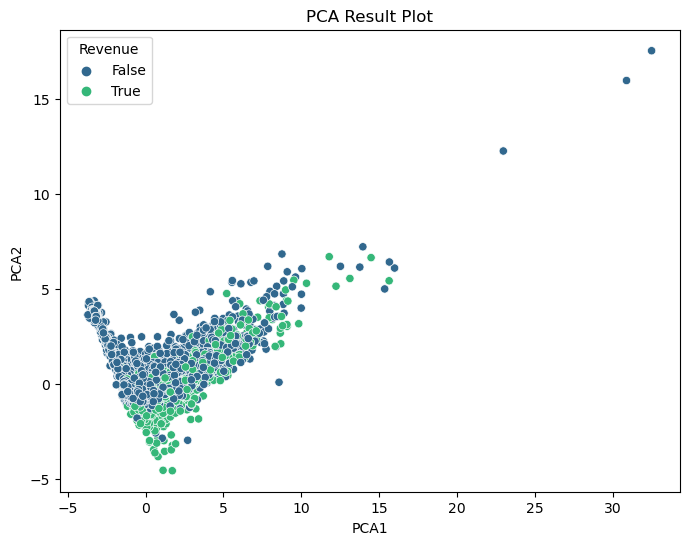

In [9]:
csv_analyzer = CsvAnalyzer(r"data/online_shoppers_intention.csv", num_cols, 'Revenue', 'LSHSTATSPLOT_500_50_10K_RERUNS')
pca_df, pca_eigenvalue, pca_eigenvector=csv_analyzer.perform_pca(num_cols)

###### Train Test Vald 
###### EDA
###### pca/tsne/....C Matrix, Uni variate (Num vs Cat) (Cat vs Cat) (Num vs Num)
###### Data agumentation (Smoot)
###### Feature (understand the domian and data and create new feature)
###### Featire selection (Feature Imp) : DT based feature imp, SVM based feature imp 

###### first commit to git (by 09/06/2024)

###### LIME/ SHAP 
###### ALGO : SVM, DT, ANN (acc, p,rc, f1score, AUC ROC)
###### Model Selection (hyperpatameter tuing (range) plots)
###### Save our model 

In [32]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.
